## Imports

In [1]:
import pandas as pd
from IPython.display import IFrame
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

import torch
from torch.utils.data import TensorDataset, DataLoader

## Dataset

##### *Features*

In [2]:
dt = pd.read_csv(r"C:\Users\emili\Downloads\Practical Class 02-20240602\data_project_nel.csv")
dt

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
0,7,7.750000,414,56.0,4.310918,434.814010,34.082367,3.695699,2.478261,2.046784,0.0,0.000000,0.077973,0.0
1,8,9.083333,357,78.0,4.167087,589.500000,36.170868,4.024165,2.176471,0.900901,0.0,0.000000,0.014157,0.0
2,6,7.666667,315,69.0,4.903333,542.577778,43.371746,2.715252,2.387302,1.063830,0.0,0.132979,0.045213,12.8
3,7,8.666667,362,69.0,4.294724,628.371901,41.683149,2.733291,2.193370,1.763224,0.0,0.000000,0.061713,16.2
4,5,6.500000,427,58.0,4.798618,479.334112,37.916393,1.888608,3.142857,0.745156,0.0,0.000000,0.444858,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,1.916667,291,NaN,3.765704,557.993151,35.426804,3.178905,2.563574,1.206434,0.0,0.000000,0.079088,0.0
320,1,1.750000,310,NaN,3.836903,549.466238,36.584194,1.633004,2.951613,2.622951,0.0,0.000000,0.240437,0.0
321,1,1.833333,293,NaN,3.755973,579.557823,37.039590,1.864855,2.747440,3.726708,0.0,0.000000,0.150311,0.0
322,1,1.666667,293,NaN,3.939010,546.159864,36.980546,3.395705,3.112628,1.535088,0.0,0.000000,0.195175,0.0


In [3]:
dt.columns

Index(['lactation', 'delivery_age_years', 'dim', 'dry_days', 'forage_kg_day',
       'rumination_min_day', 'milk_kg_day', 'milk_kg_min_robot',
       'milkings_day', 'errors_by_100_milkings', 'high_cdt_by_100_milkings',
       'watery_by_100_milkings', 'refusals_by_milking',
       'colostrum_separated_kg'],
      dtype='object')

In [4]:
IFrame('./nel_data_dictionary.pdf', width=1000, height=300)

In [5]:
dt.describe()

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
count,324.000000,324.000000,324.000000,177.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,2.055556,3.040895,327.617284,65.440678,4.657507,527.641508,39.585367,2.806910,2.969289,1.746837,0.202839,0.067426,0.257540,11.773148
std,1.320240,1.432558,46.261491,9.349777,0.585053,53.863379,6.698681,0.839749,0.552387,3.505659,1.045158,0.381647,0.248818,15.401783
min,1.000000,1.666667,249.000000,22.000000,2.887079,316.874074,15.355600,0.951521,2.016340,0.000000,0.000000,0.000000,0.003241,0.000000
25%,1.000000,1.916667,296.000000,61.000000,4.318435,490.580690,34.709342,2.147157,2.529756,0.152436,0.000000,0.000000,0.084442,0.000000
50%,2.000000,2.750000,313.500000,66.000000,4.672403,537.830980,39.510841,2.787723,2.940860,0.786993,0.000000,0.000000,0.187785,5.800000
75%,3.000000,3.750000,346.250000,70.000000,5.012795,566.156378,43.973411,3.344835,3.391920,1.582636,0.000000,0.000000,0.346494,20.200000
max,8.000000,9.083333,590.000000,112.000000,6.340225,638.546053,59.722312,5.526386,5.024390,36.382323,13.333333,3.826955,1.520631,82.500000


Check for missing values

In [6]:
dt.isna().sum()

lactation                     0
delivery_age_years            0
dim                           0
dry_days                    147
forage_kg_day                 0
rumination_min_day            0
milk_kg_day                   0
milk_kg_min_robot             0
milkings_day                  0
errors_by_100_milkings        0
high_cdt_by_100_milkings      0
watery_by_100_milkings        0
refusals_by_milking           0
colostrum_separated_kg        0
dtype: int64

In [7]:
# Como tratar estes missing values.
# dry_days - periodo depois da latancia ( os missing values são so os primeiros )

Basic exploratory plots

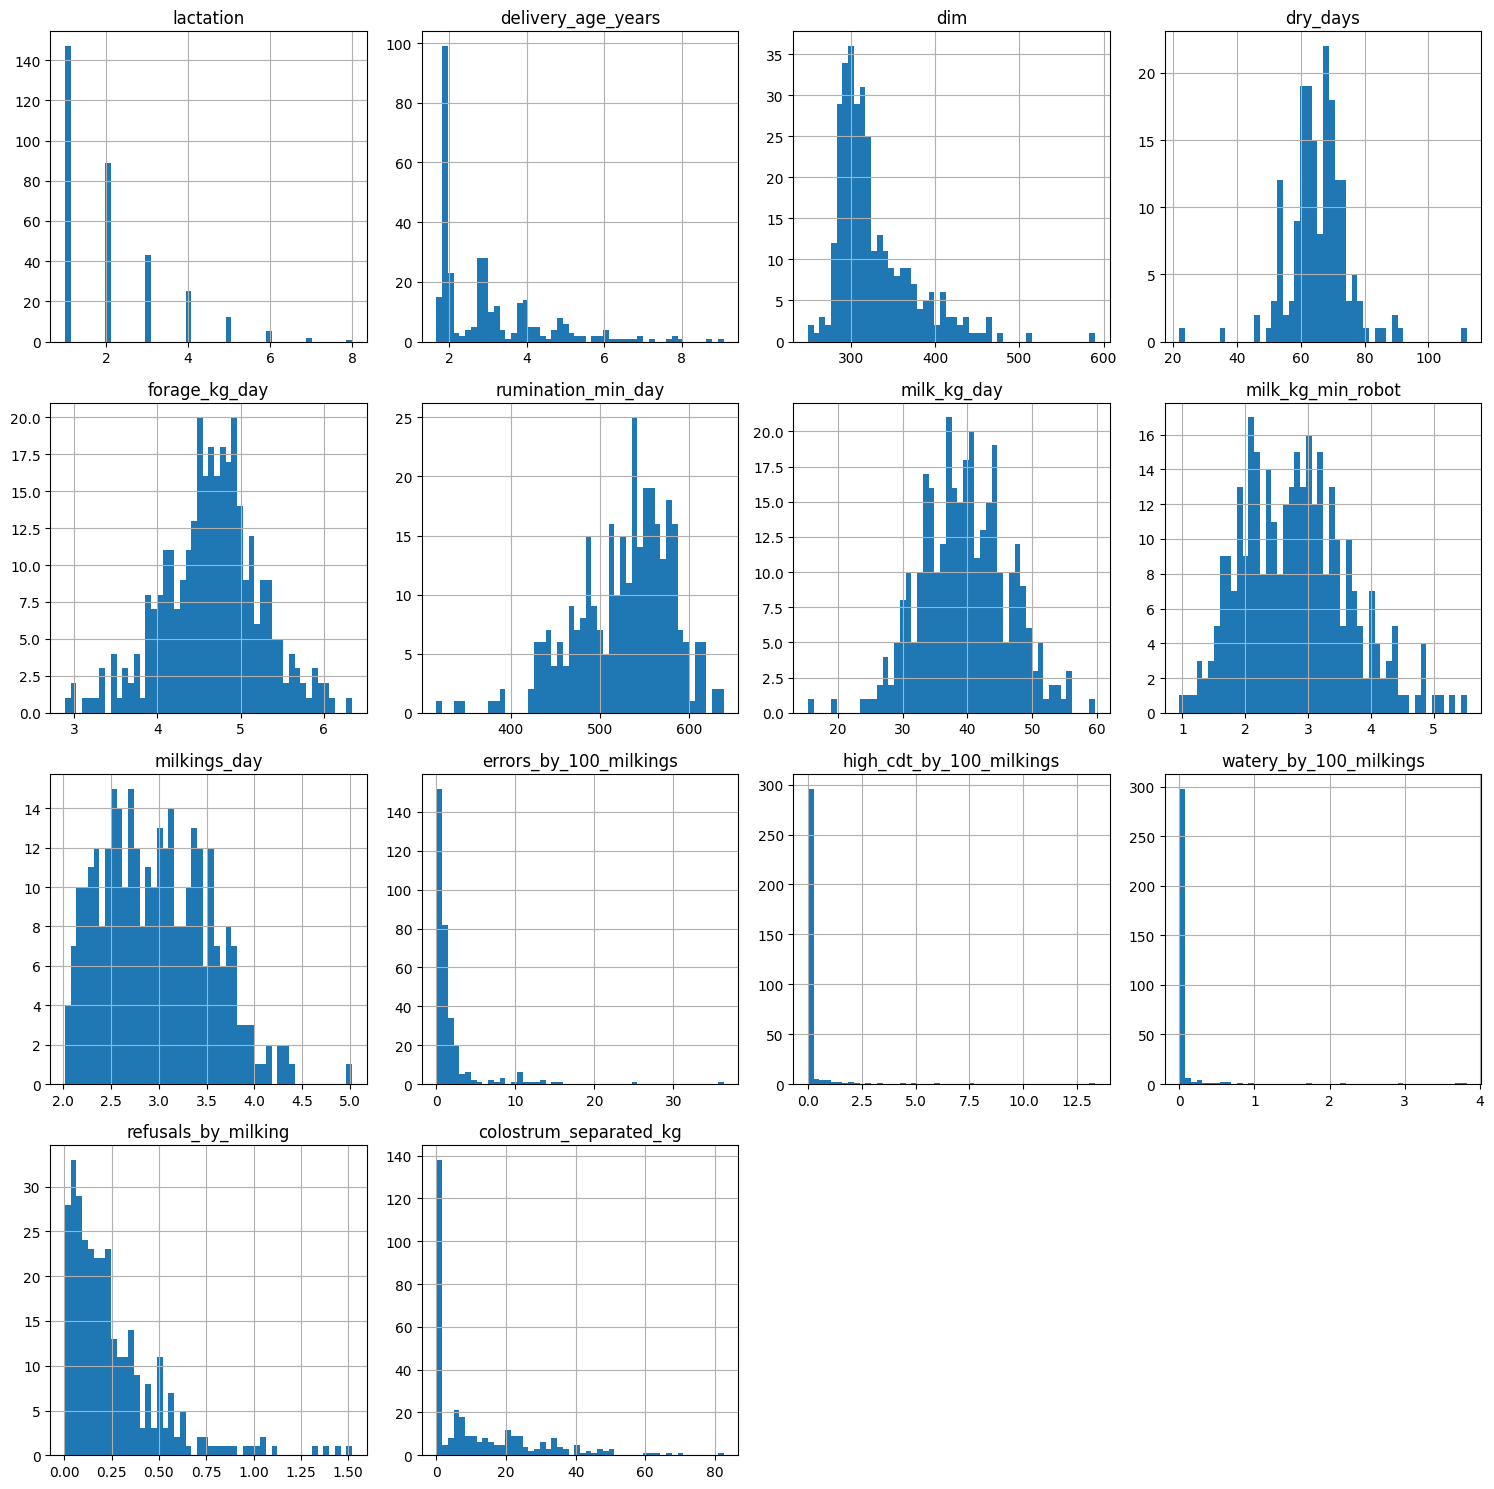

In [8]:
dt.hist(figsize=(15, 15), bins=50)
plt.grid(False)
plt.tight_layout()
plt.show()


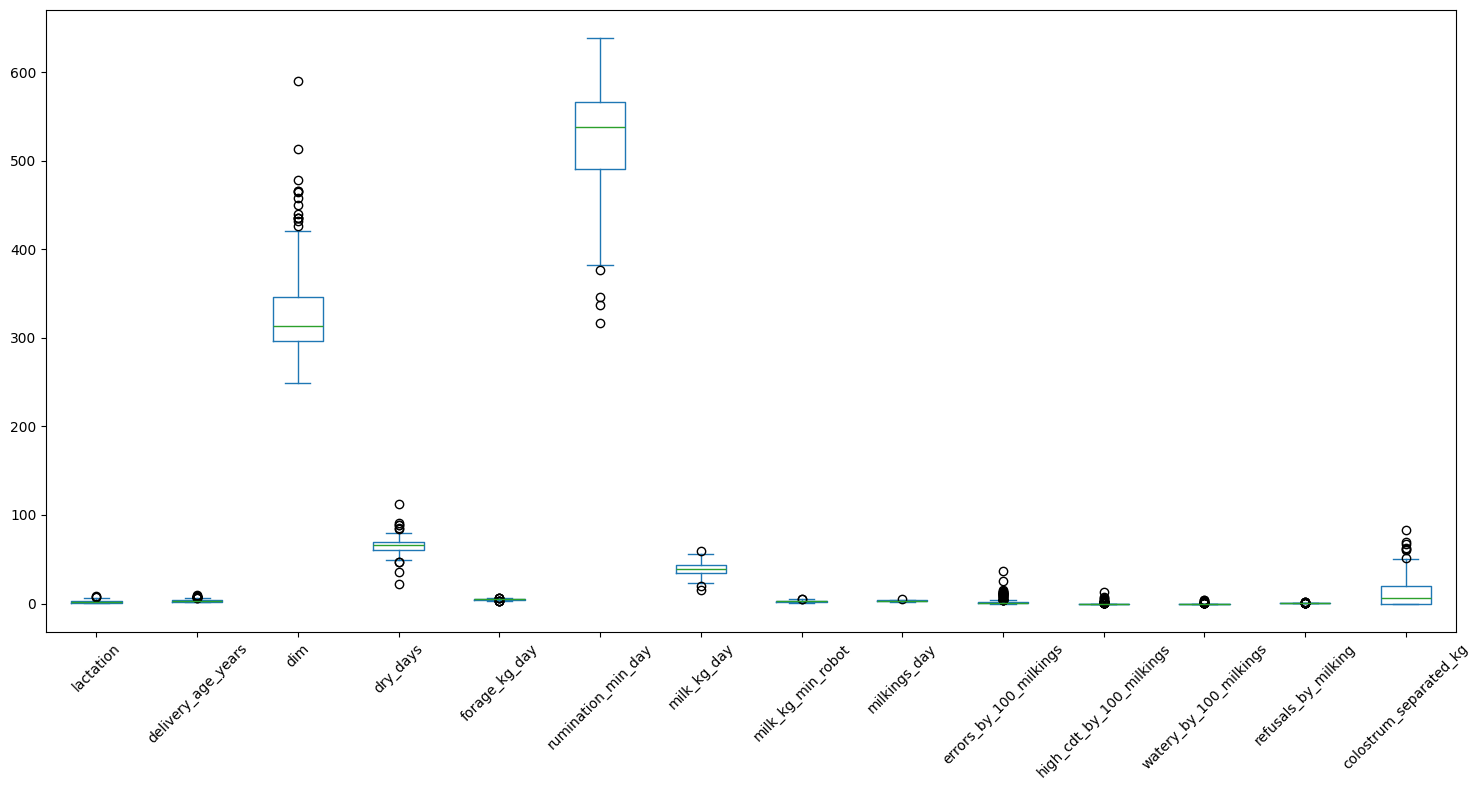

In [9]:
dt.plot(kind='box', figsize=(15, 8))
plt.xticks(ticks=range(1, len(dt.columns) + 1), labels=dt.columns, rotation=45)
plt.tight_layout()
plt.show()


##### *Targets*

In [10]:
y = pd.read_csv(r"C:\Users\emili\Downloads\Practical Class 02-20240602\y_lactose.csv")

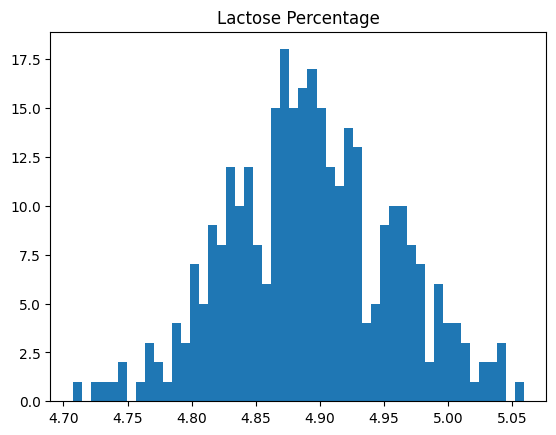

In [11]:
plt.hist(y, bins=50, color='tab:blue')
plt.title('Lactose Percentage')
plt.show()


### Treating missing values

In [12]:
dt.isna().sum()

lactation                     0
delivery_age_years            0
dim                           0
dry_days                    147
forage_kg_day                 0
rumination_min_day            0
milk_kg_day                   0
milk_kg_min_robot             0
milkings_day                  0
errors_by_100_milkings        0
high_cdt_by_100_milkings      0
watery_by_100_milkings        0
refusals_by_milking           0
colostrum_separated_kg        0
dtype: int64

In [13]:
dt = dt.drop(columns=['dry_days'])

We will continue the project wihtout this feature.

### Treating duplicates

In [14]:
dt.duplicated().sum()

0

There are no dulpicates in the dataset.

### Treating outliers

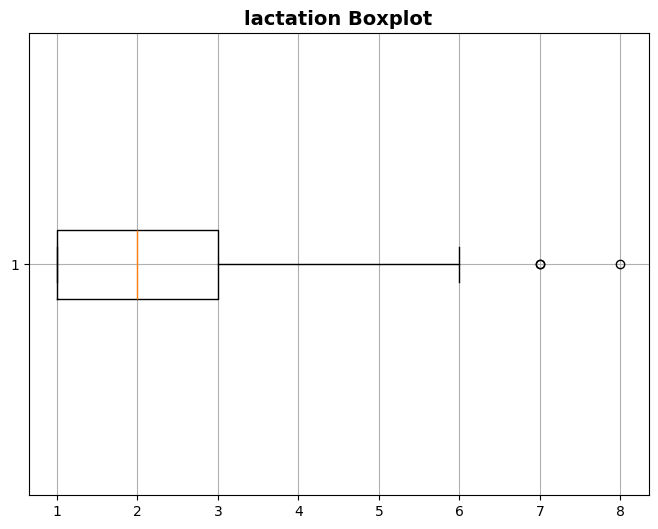

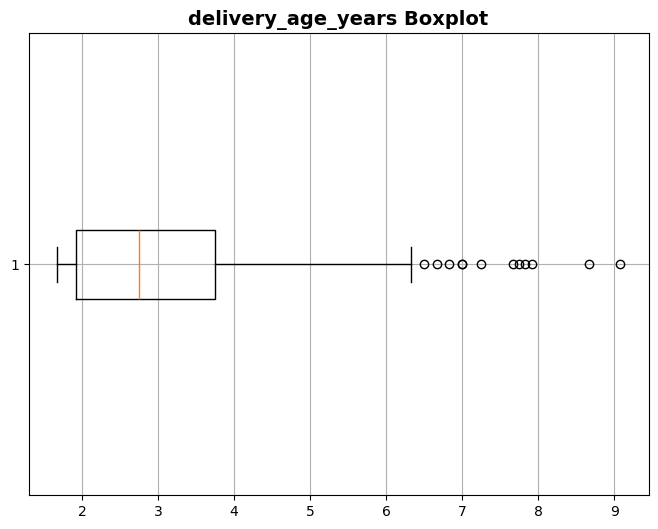

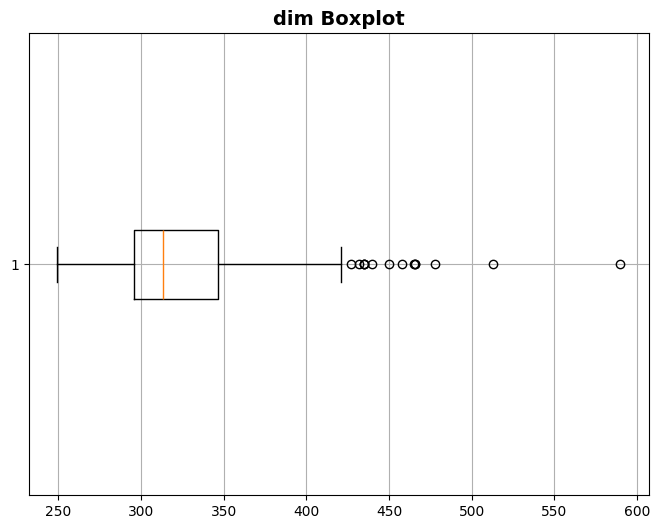

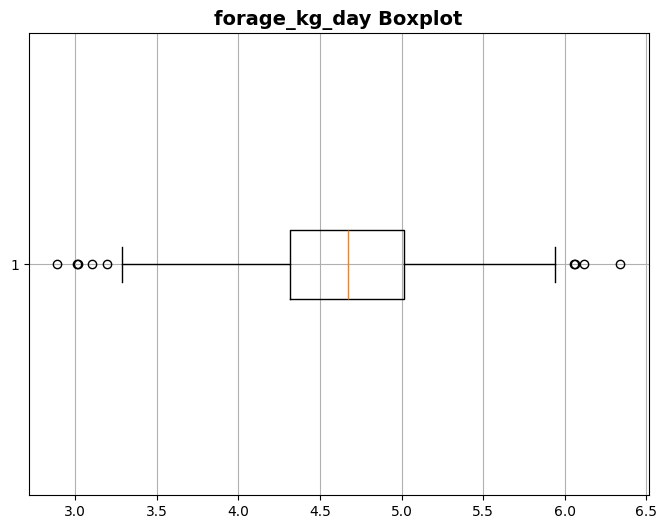

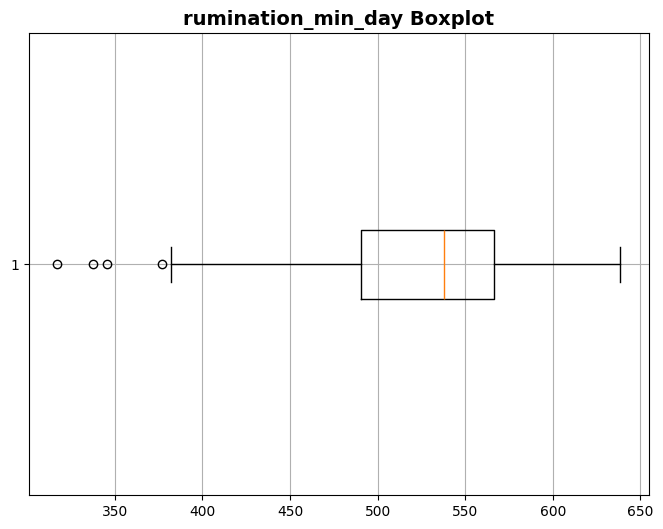

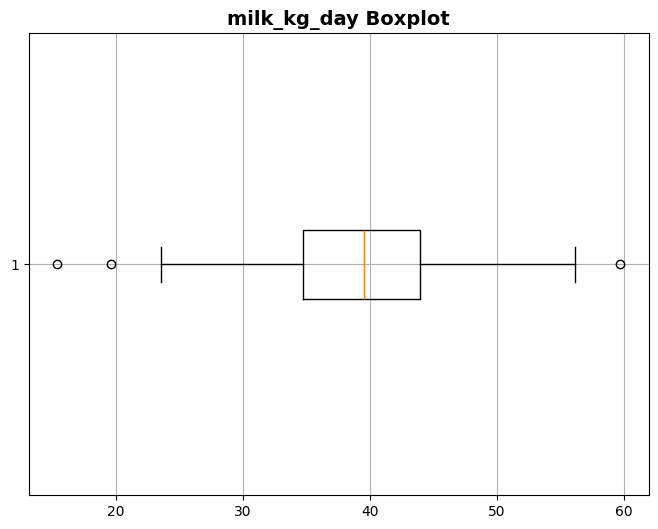

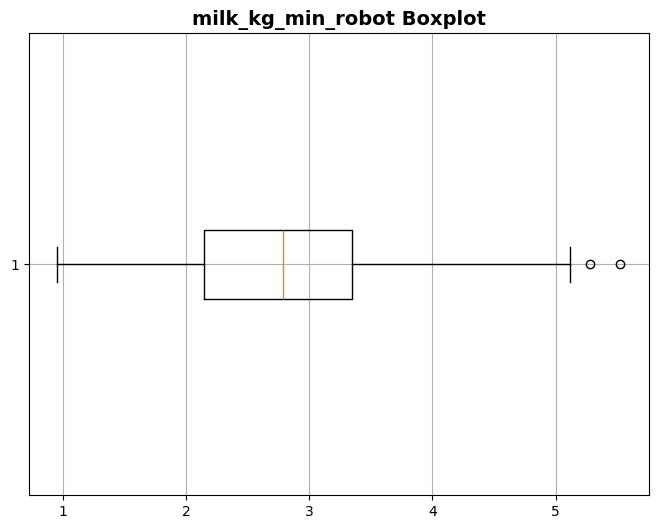

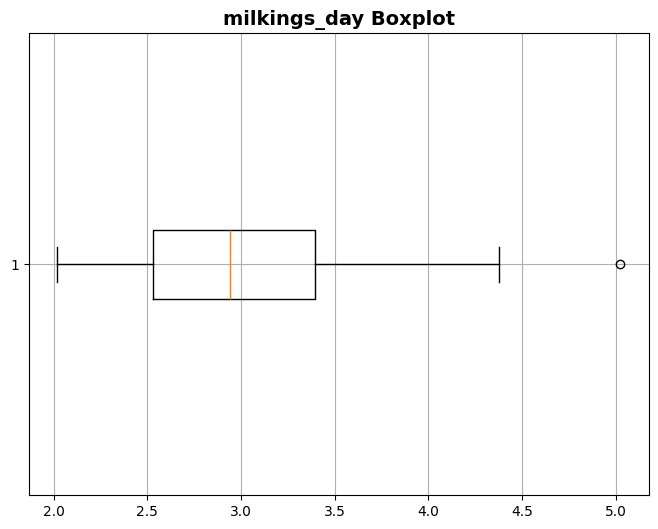

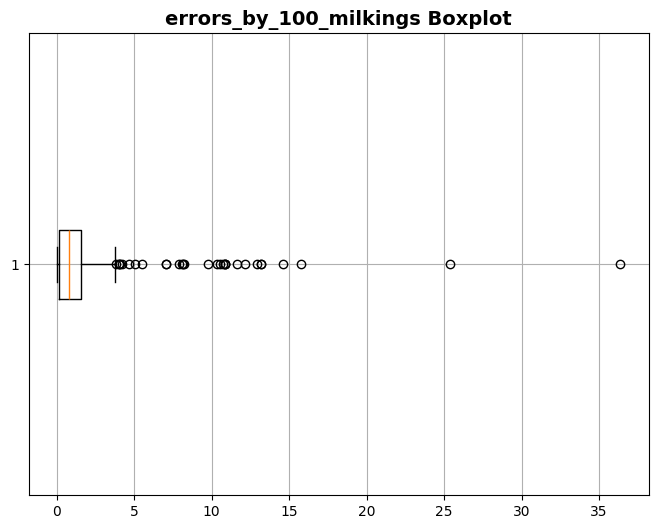

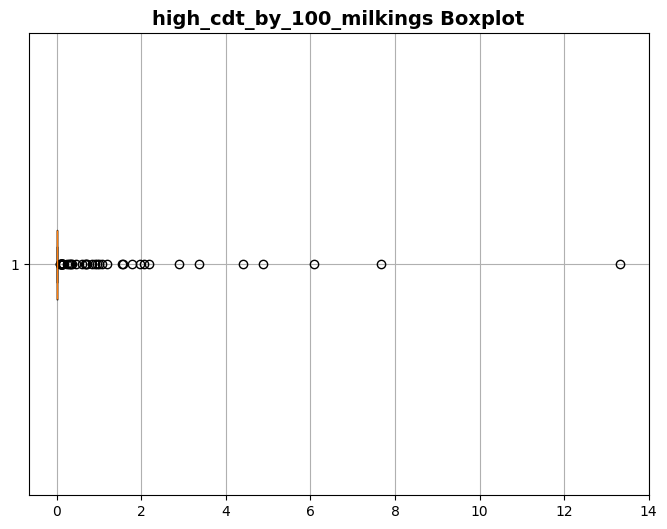

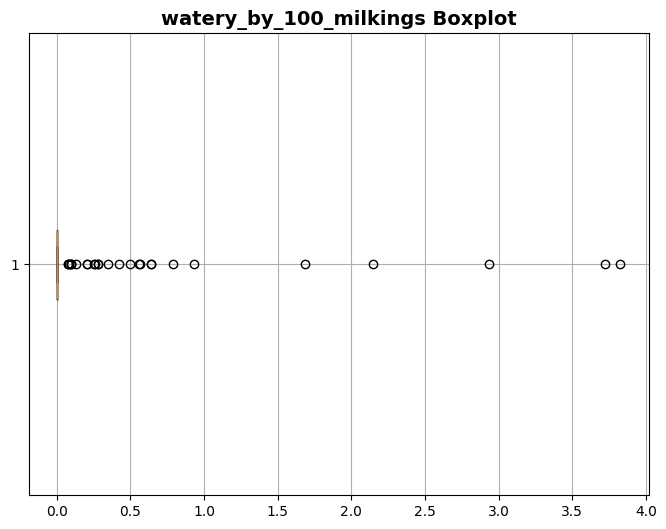

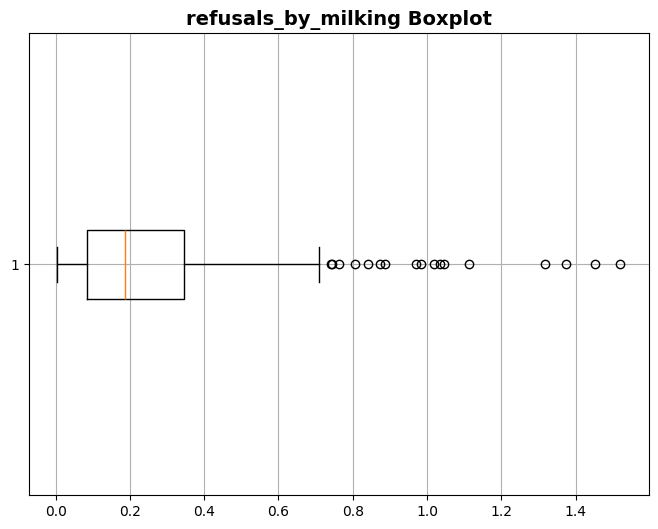

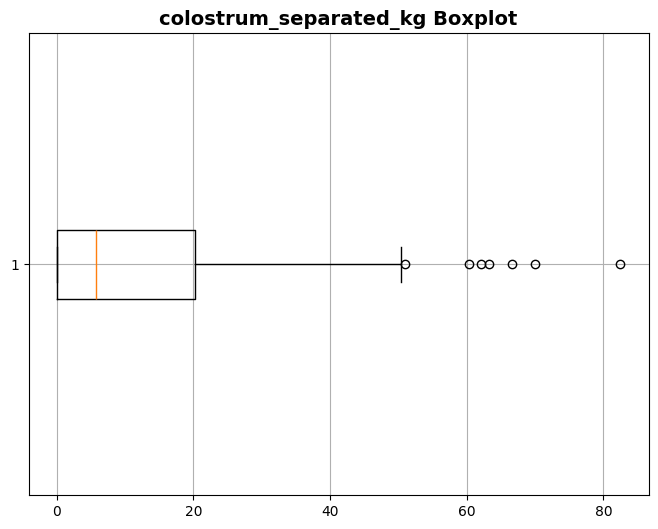

In [15]:
for i in dt:
    plt.figure(figsize=(8, 6))
    plt.boxplot(dt[i], vert=False)
    plt.xlabel('')
    plt.title(f'{i} Boxplot', fontsize=14, fontweight='bold')
    plt.grid(True)
    plt.show()

Manually removal of outliers, based on the boxplots:

In [16]:
#filters1 = (
#    (dt['dim']<=550)
#    &
#    (dt['errors_by_100_milkings']<=20)
#    &
#    (dt['high_cdt_by_100_milkings']<=6)
#    &
#    (dt['watery_by_100_milkings']<=1.5)
#    &
#    (dt['refusals_by_milking']<=1.2)
#    &
#    (dt['colostrum_separated_kg']<= 80)
#)

#dt_new2 = dt[filters1]
#print('Percentage of data kept after removing outliers:', np.round(dt_new2.shape[0] / dt.shape[0], 4))

In [17]:
# Print initial lengths
print("Initial length of dt:", len(dt))
print("Initial length of y:", len(y))

filters1 = (
    (dt['dim']<=550)
    &
    (dt['errors_by_100_milkings']<=20)
    &
    (dt['high_cdt_by_100_milkings']<=6)
    &
    (dt['watery_by_100_milkings']<=1.5)
    &
    (dt['refusals_by_milking']<=1.2)
    &
    (dt['colostrum_separated_kg']<= 80)
)

dt_new2 = dt[filters1]
print('Percentage of data kept after removing outliers:', np.round(dt_new2.shape[0] / dt.shape[0], 4))

Initial length of dt: 324
Initial length of y: 324
Percentage of data kept after removing outliers: 0.9568


In [18]:
#Apply the filter
dt = dt_new2

# Filter y using the same indices as the filtered dt
y = y.loc[dt.index]

# Ensure y is a numpy array
y = y.values.flatten()

# Print lengths after filtering
print("Length of dt after filtering:", len(dt))
print("Length of y after filtering:", len(y))

Length of dt after filtering: 310
Length of y after filtering: 310


### Inconsistencies

In [19]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 323
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lactation                 310 non-null    int64  
 1   delivery_age_years        310 non-null    float64
 2   dim                       310 non-null    int64  
 3   forage_kg_day             310 non-null    float64
 4   rumination_min_day        310 non-null    float64
 5   milk_kg_day               310 non-null    float64
 6   milk_kg_min_robot         310 non-null    float64
 7   milkings_day              310 non-null    float64
 8   errors_by_100_milkings    310 non-null    float64
 9   high_cdt_by_100_milkings  310 non-null    float64
 10  watery_by_100_milkings    310 non-null    float64
 11  refusals_by_milking       310 non-null    float64
 12  colostrum_separated_kg    310 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 33.9 KB


In [20]:
dt.describe()

,lactation,delivery_age_years,dim,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,2.035484,3.013172,326.500000,4.652202,527.935532,39.525412,2.797355,2.956252,1.566809,0.110379,0.023958,0.245585,11.697419
std,1.310413,1.416193,43.909052,0.589444,54.086631,6.678435,0.837267,0.537667,2.635616,0.514894,0.109833,0.214670,15.089734
min,1.000000,1.666667,249.000000,2.887079,316.874074,15.355600,0.951521,2.016340,0.000000,0.000000,0.000000,0.003241,0.000000
25%,1.000000,1.916667,296.250000,4.301467,491.137222,34.702685,2.145612,2.525684,0.160046,0.000000,0.000000,0.083914,0.000000
50%,2.000000,2.750000,313.000000,4.672403,538.341722,39.469429,2.787723,2.937027,0.760818,0.000000,0.000000,0.187302,5.750000
75%,3.000000,3.750000,346.000000,5.006509,566.012784,43.922325,3.333224,3.364798,1.575673,0.000000,0.000000,0.344804,20.200000
max,8.000000,9.083333,513.000000,6.340225,638.546053,59.722312,5.526386,4.378049,15.754190,4.876033,0.929615,1.113010,70.000000


In [21]:
dt['colostrum_separated_kg'].unique()

array([ 0. , 12.8, 16.2, 20.2, 14.4, 29.8, 47. ,  9.4, 17.2, 43.9, 34.5,
       66.7, 63.2, 47.8,  8.1, 28.3,  8.3, 13. , 33.4, 51. , 31.4, 36.3,
       50. , 48. , 10.7, 39.8, 42.6, 36.9, 48.7, 29.6, 25.9, 41.2,  9.6,
       37.4, 20.9,  6.4, 22.2, 43.7, 22.6, 22.1, 40.1, 24.7, 11.3, 30.8,
       32.1, 15.9, 62.1, 15.4, 23.8, 20.4,  9.9, 24.6, 33.5, 31.2, 18.2,
       15.8, 28.5, 31.6, 44.6, 30.5,  8. ,  5.2, 34.3,  8.6, 70. , 50.4,
        7.2, 12.5, 21.9, 34.4, 18.4,  8.8,  7.3, 23.3, 11.1, 20.3,  5.4,
       27.9,  5.5,  7.6, 10.6,  3.4,  2.8,  5.8, 36. ,  8.2,  5.7, 25.4,
       35.4, 12. , 34.2,  4.2, 22.3, 17.6,  6.6, 60.4, 35.5,  5.9,  7.7,
       33.3, 27.8,  6.3,  8.4, 11.5,  7.1, 26. , 22.9, 14.8, 23.9, 20.5,
        4.1, 13.6,  5. , 24.9, 13.9, 14.1,  6.8, 11.9, 14. , 10.8, 23.2,
       19.5, 17.7,  5.1, 35.3,  3.5, 13.4,  4.9, 14.9,  3.7, 10.1, 24.5,
       19. , 10.3, 20.1, 23.6])

Having check the unique values, max and min values, among other values, for each variable, no inconsistencies were found.

### Features engeneering

### Feature selection

#### Person correlation plot

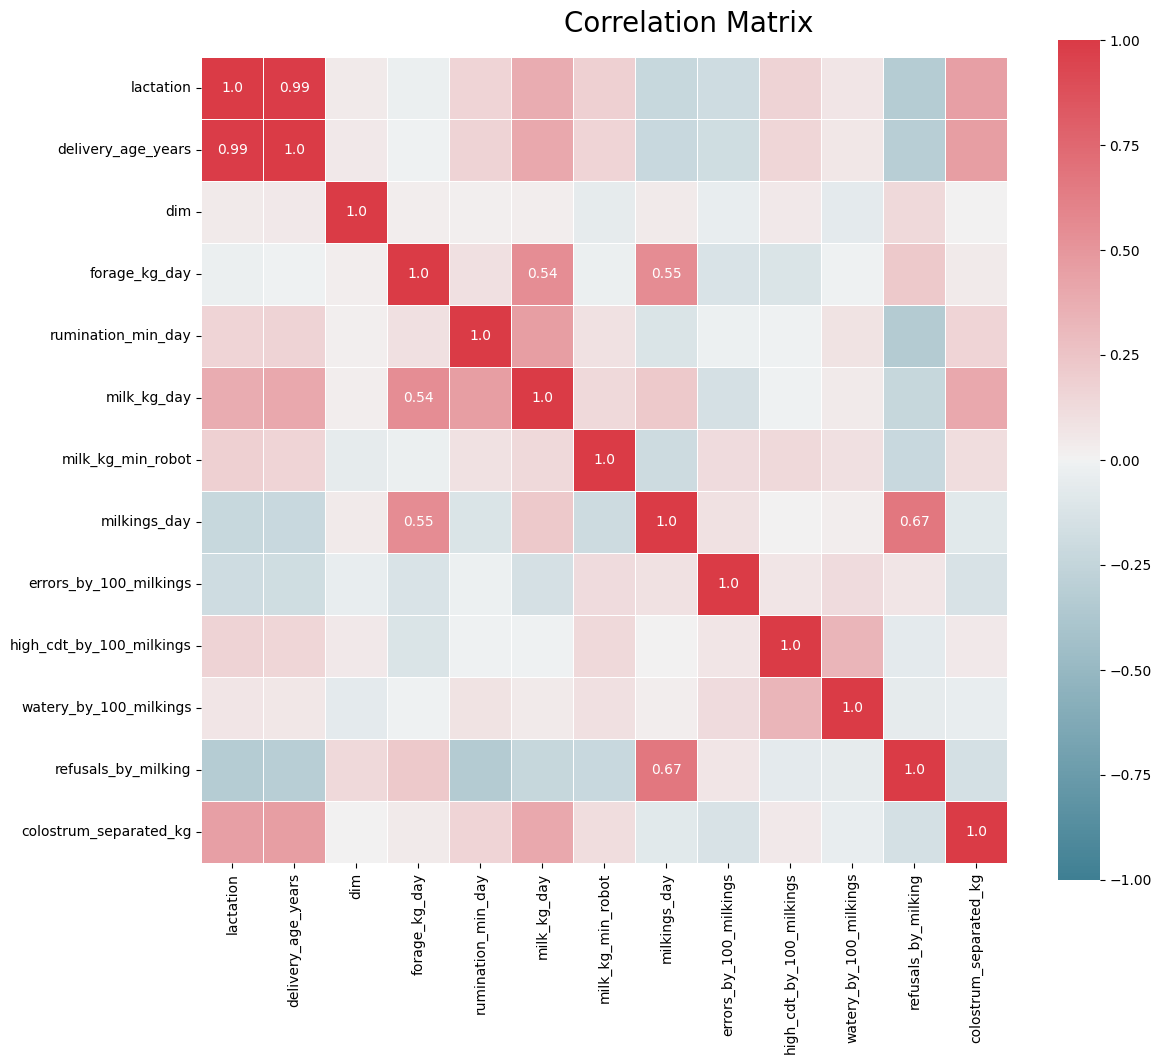

In [22]:
fig = plt.figure(figsize=(13,10))


corr = np.round(dt.corr(method="pearson"), decimals=2)

mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))


sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)


fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

- Lactation period is highly dependent on the age of the cow at the
delivery of the corresponding
lactation period (high correlation » 0.99). Therefore we will remove 'delivery_age_years'.

In [23]:
dt = dt.drop(columns=['delivery_age_years'])
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 323
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lactation                 310 non-null    int64  
 1   dim                       310 non-null    int64  
 2   forage_kg_day             310 non-null    float64
 3   rumination_min_day        310 non-null    float64
 4   milk_kg_day               310 non-null    float64
 5   milk_kg_min_robot         310 non-null    float64
 6   milkings_day              310 non-null    float64
 7   errors_by_100_milkings    310 non-null    float64
 8   high_cdt_by_100_milkings  310 non-null    float64
 9   watery_by_100_milkings    310 non-null    float64
 10  refusals_by_milking       310 non-null    float64
 11  colostrum_separated_kg    310 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 31.5 KB


## Modeling

### 1. Genetic Programming (GP)

In [24]:
import csv

from gpolnel.utils.utils import train_test_split

from gpolnel.utils.inductive_programming import function_map
from gpolnel.operators.initializers import ERC

from gpolnel.problems.inductive_programming import SML
from gpolnel.utils.ffunctions import Ffunctions

from gpolnel.algorithms.genetic_algorithm import GeneticAlgorithm
from gpolnel.operators.initializers import grow, prm_grow, ERC, full, rhh, prm_full
from gpolnel.operators.variators import swap_xo, prm_subtree_mtn
from gpolnel.operators.selectors import prm_tournament

import os

from scipy.stats import wilcoxon

In [25]:
X = dt.copy()
X

,lactation,dim,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
0,7,414,4.310918,434.814010,34.082367,3.695699,2.478261,2.046784,0.0,0.000000,0.077973,0.0
1,8,357,4.167087,589.500000,36.170868,4.024165,2.176471,0.900901,0.0,0.000000,0.014157,0.0
2,6,315,4.903333,542.577778,43.371746,2.715252,2.387302,1.063830,0.0,0.132979,0.045213,12.8
3,7,362,4.294724,628.371901,41.683149,2.733291,2.193370,1.763224,0.0,0.000000,0.061713,16.2
4,5,427,4.798618,479.334112,37.916393,1.888608,3.142857,0.745156,0.0,0.000000,0.444858,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,291,3.765704,557.993151,35.426804,3.178905,2.563574,1.206434,0.0,0.000000,0.079088,0.0
320,1,310,3.836903,549.466238,36.584194,1.633004,2.951613,2.622951,0.0,0.000000,0.240437,0.0
321,1,293,3.755973,579.557823,37.039590,1.864855,2.747440,3.726708,0.0,0.000000,0.150311,0.0
322,1,293,3.939010,546.159864,36.980546,3.395705,3.112628,1.535088,0.0,0.000000,0.195175,0.0


In [26]:
y

array([4.95350281, 4.98312824, 4.88910438, 4.86896914, 4.84540225,
       4.84563267, 4.91372331, 4.92746983, 4.84450053, 4.87388589,
       4.83222457, 4.85893541, 4.91861703, 4.90680509, 4.86646602,
       4.92795019, 4.95337905, 4.88925494, 4.90836272, 4.8349334 ,
       4.82728269, 5.0105964 , 4.97014994, 4.95634625, 4.97645054,
       4.85648754, 4.90536065, 4.84316612, 4.82275115, 4.81161875,
       4.81917111, 4.8298237 , 4.80170891, 4.86391851, 4.89987568,
       4.88381787, 4.92709622, 4.80088551, 4.85565301, 4.76128959,
       4.89520729, 4.82626255, 4.86638312, 4.91860485, 4.89461551,
       4.87664818, 4.81596775, 4.91818108, 4.89272141, 4.81090047,
       4.81858064, 4.77299872, 4.86738584, 4.9372383 , 5.03112373,
       5.01160987, 4.85472191, 4.90276493, 4.85338446, 4.88542927,
       4.87411343, 4.87477843, 5.00734426, 5.05896682, 5.03290922,
       4.86866444, 4.91702743, 4.89546243, 4.74354973, 4.76975755,
       4.92663522, 4.93166783, 4.84312391, 4.89861981, 4.88276

In [27]:
# Convert to PyTorch tensors
X = X.values
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)  # or torch.long if they are integer labels

print(X)
print(y)

tensor([[7.0000e+00, 4.1400e+02, 4.3109e+00,  ..., 0.0000e+00, 7.7973e-02,
         0.0000e+00],
        [8.0000e+00, 3.5700e+02, 4.1671e+00,  ..., 0.0000e+00, 1.4157e-02,
         0.0000e+00],
        [6.0000e+00, 3.1500e+02, 4.9033e+00,  ..., 1.3298e-01, 4.5213e-02,
         1.2800e+01],
        ...,
        [1.0000e+00, 2.9300e+02, 3.7560e+00,  ..., 0.0000e+00, 1.5031e-01,
         0.0000e+00],
        [1.0000e+00, 2.9300e+02, 3.9390e+00,  ..., 0.0000e+00, 1.9518e-01,
         0.0000e+00],
        [1.0000e+00, 2.6700e+02, 2.8871e+00,  ..., 0.0000e+00, 3.2668e-02,
         0.0000e+00]])
tensor([4.9535, 4.9831, 4.8891, 4.8690, 4.8454, 4.8456, 4.9137, 4.9275, 4.8445,
        4.8739, 4.8322, 4.8589, 4.9186, 4.9068, 4.8665, 4.9280, 4.9534, 4.8893,
        4.9084, 4.8349, 4.8273, 5.0106, 4.9701, 4.9563, 4.9765, 4.8565, 4.9054,
        4.8432, 4.8228, 4.8116, 4.8192, 4.8298, 4.8017, 4.8639, 4.8999, 4.8838,
        4.9271, 4.8009, 4.8557, 4.7613, 4.8952, 4.8263, 4.8664, 4.9186, 4.8946,
    

#### Global settings

In [28]:
seed = 1
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

In [29]:
# Defines parameters for the data usage
shuffle, p_test, p_val, n_batches_pct = True, .3, .3, 1

In [30]:
y = y.reshape(-1)
print(X.shape, y.shape)
print(X[:3])
print(y[:3])


torch.Size([310, 12]) torch.Size([310])
tensor([[7.0000e+00, 4.1400e+02, 4.3109e+00, 4.3481e+02, 3.4082e+01, 3.6957e+00,
         2.4783e+00, 2.0468e+00, 0.0000e+00, 0.0000e+00, 7.7973e-02, 0.0000e+00],
        [8.0000e+00, 3.5700e+02, 4.1671e+00, 5.8950e+02, 3.6171e+01, 4.0242e+00,
         2.1765e+00, 9.0090e-01, 0.0000e+00, 0.0000e+00, 1.4157e-02, 0.0000e+00],
        [6.0000e+00, 3.1500e+02, 4.9033e+00, 5.4258e+02, 4.3372e+01, 2.7153e+00,
         2.3873e+00, 1.0638e+00, 0.0000e+00, 1.3298e-01, 4.5213e-02, 1.2800e+01]])
tensor([4.9535, 4.9831, 4.8891])


#### Data split

In [31]:
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, p_test=p_test, seed=seed)

# Train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, p_test=p_val, seed=seed)
total_batches = 1
batch_size = X_train.shape[0]
print('Batch size: {}\nTotal batches: {}\n'.format(batch_size, total_batches))

print('Train:\t{}\nVal:\t{}\nTest:\t{}'.format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
print('Total:\t{}'.format(X_train.shape[0] + X_val.shape[0] + X_test.shape[0]))

# Creates training and validatation data sets
ds_train = TensorDataset(X_train, y_train)
ds_val = TensorDataset(X_val, y_val)

# Creates training and test data loaders
dl_train = DataLoader(ds_train, batch_size, shuffle)
dl_val = DataLoader(ds_val, batch_size, shuffle)

Batch size: 152
Total batches: 1

Train:	152
Val:	65
Test:	93
Total:	310


#### Step 1: Search space definition

In [32]:
fset = [function_map['add'], function_map['sub'], function_map['mul'], function_map['div']] #4 operations

sspace_sml = {
    'n_dims': X.shape[1],
    'function_set': fset, 'constant_set': ERC(-1., 1.),
    'p_constants': 0.1,
    'max_init_depth': 3,
    'max_depth': 10, 
    'n_batches': total_batches,
    'device': device
}

In [33]:
sspace_sml

{'n_dims': 12,
 'function_set': [add, sub, mul, div],
 'constant_set': <gpolnel.operators.initializers.ERC at 0x21c5ddda8d0>,
 'p_constants': 0.1,
 'max_init_depth': 3,
 'max_depth': 10,
 'n_batches': 1,
 'device': 'cpu'}

#### Step 2: SML Problem instance definition

In [34]:
pi_sml = SML(
    sspace=sspace_sml,
    ffunction=Ffunctions('rmse'),
    dl_train=dl_train, dl_test=dl_val,  # For the algorithm, the unseen is our validation!
    n_jobs=8
)

#### Step 3: GP instatiation for grow method

- Initializer: grow
- Selector: prm_tournament
- Mutator: prm_subtree_mtn

In [35]:
ps = 152   #batch size seen on datasplit
selection_pressure = .07 #0.07
mutation_prob = .1
xo_prob = .9
has_elitism = True
allow_reproduction = False

mheuristic = GeneticAlgorithm(
    pi=pi_sml,
    initializer=grow,        #on intializers:  full, rrh,...  
    selector=prm_tournament(pressure=selection_pressure),       #selection_pressure = .07    #on selectors
    crossover=swap_xo,         # on variators
    mutator=prm_subtree_mtn(initializer=prm_grow(sspace_sml)),    # on variators
    pop_size=ps,   #ps = 250
    p_m=mutation_prob,   #mutation_prob = .1
    p_c=xo_prob,   #xo_prob = .9
    elitism=has_elitism,   #has_elitism = True
    reproduction=allow_reproduction,  # False = or xo or mutation
    device=device,
    seed=seed
)

##### GP initialization

In [36]:
mheuristic._initialize()

In [37]:
print(mheuristic.pop)

0)	[sub, mul, div, 6, tensor(-0.9433), 0, 3] (fit: tensor(545.1837))
1)	[add, add, 0, 6, sub, 8, 10] (fit: tensor(1.5879))
2)	[sub, 6, sub, 5, 10] (fit: tensor(4.5470))
3)	[sub, 7, 0] (fit: tensor(6.2725))
4)	[div, 2, 11] (fit: tensor(4.2107))
5)	[mul, 1, 6] (fit: tensor(986.2214))
6)	[mul, div, 9, 2, add, 8, 5] (fit: tensor(4.8776))
7)	[mul, 9, div, 8, 0] (fit: tensor(4.8847))
8)	[div, div, 6, tensor(0.0802), 0] (fit: tensor(23.7151))
9)	[sub, sub, mul, 10, tensor(-0.9666), mul, 9, 1, sub, 2, 4] (fit: tensor(34.9371))
10)	[div, 1, mul, 3, 11] (fit: tensor(4.4229))
11)	[sub, 0, add, 11, div, 3, 10] (fit: tensor(17381.0254))
12)	[add, 6, mul, 0, tensor(-0.8471)] (fit: tensor(3.9338))
13)	[mul, div, 8, sub, 11, 5, sub, 7, div, 0, 6] (fit: tensor(6.2487))
14)	[mul, 5, 3] (fit: tensor(1503.4840))
15)	[mul, div, 10, 8, add, add, 8, 5, 5] (fit: tensor(2.6880))
16)	[add, div, 1, tensor(-0.8536), sub, 9, tensor(0.1005)] (fit: tensor(391.6485))
17)	[add, 9, div, 0, tensor(0.3408)] (fit: tensor(

In [38]:
print(mheuristic.pop.individuals[0].repr_)

[sub, mul, div, 6, tensor(-0.9433), 0, 3]


In [39]:
dt_features =['lactation','delivery_age_years','dim','forage_kg_day','rumination_min_day','milk_kg_day','milk_kg_min_robot','milkings_day','errors_by_100_milkings','high_cdt_by_100_milkings','watery_by_100_milkings','refusals_by_milking','colostrum_separated_kg']

mheuristic.pop.individuals[0].printTree(feature_names=dt_features)

sub( mul( div( milk_kg_min_robot, -0.9433 ) lactation ) forage_kg_day )


In [40]:
print(f'\nGP population: {mheuristic.pop.__class__} ({len(mheuristic.pop)} individuals)')

print(f'\nPoppulation fitness {mheuristic.pop.fit[:3]}...')
print(f'Poppulation valid {mheuristic.pop.valid[:3]}...\n')

for i in range(3):
    print(f'Individual {i}: {mheuristic.pop.individuals[i].repr_}, fitness {mheuristic.pop.individuals[i].fit}')

print(f'\nGP best individual {mheuristic.best_sol.printTree(out="string")}, fitness {mheuristic.best_sol.fit}\n\n')


GP population: <class 'gpolnel.utils.population.PopulationTree'> (152 individuals)

Poppulation fitness tensor([545.1837,   1.5879,   4.5470])...
Poppulation valid [True, True, True]...

Individual 0: [sub, mul, div, 6, tensor(-0.9433), 0, 3], fitness 545.1836547851562
Individual 1: [add, add, 0, 6, sub, 8, 10], fitness 1.5878819227218628
Individual 2: [sub, 6, sub, 5, 10], fitness 4.546965599060059

GP best individual add( x_6, x_5 ), fitness 1.1518787145614624




##### Solve

In [41]:
# Log settings
file_dir = './log/'
file_name = 'intro_project_2log'
log_path = file_dir + file_name
if os.path.exists(file_dir + file_name):
    os.remove(file_dir + file_name)
if not os.path.exists(file_dir):
    os.makedirs(file_dir)

In [42]:
# Learning
n_iter = 50

mheuristic.solve(
    n_iter,   #n_iter = 50
    verbose=3, log=3, log_path=log_path,
    test_elite=True
)

-------------------------------------------------------------------------------------------------------
           |                    Best solution                      |            Population            |
-------------------------------------------------------------------------------------------------------
Generation | Length   Fitness          Test Fitness         Timing | AVG Fitness           STD Fitness
-------------------------------------------------------------------------------------------------------

0.681845486164093
0.6082742810249329

0          | 3        0.681845         0.608274              0.136 | -1                             -1

0.6752442121505737
0.6287890672683716

1          | 7        0.675244         0.628789              0.147 | -1                             -1

0.6578058004379272
0.6243472099304199

2          | 7        0.657806         0.624347              0.133 | -1                             -1

0.6578058004379272
0.6243472099304199

3          | 

##### GP evolution

In [43]:
# Open log file
rows = []
with open(log_path, 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Process each row (each row is a list of values)
        rows.append(row)

# Fitness history
history_fits = [float(row[7].split('(')[1].split(')')[0]) for row in rows]

# Val fitness history
history_val_fits = [float(row[8].split('(')[1].split(')')[0]) for row in rows]

# Solution size history
history_sizes = [int(row[6]) for row in rows]

# Runtime
history_timing = [float(row[5]) for row in rows]

#### RMSE

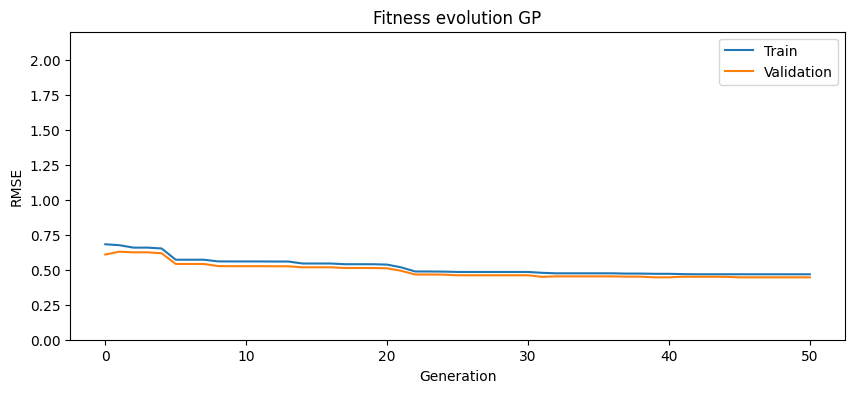

Best solution RMSE fitness: 0.47 train, 0.45 validation.



In [44]:
plt.figure(figsize=(10, 4))

plt.plot(history_fits, label='Train')
plt.plot(history_val_fits, label='Validation')
plt.title('Fitness evolution GP')
plt.xlabel('Generation')
plt.ylabel('RMSE')
plt.ylim(bottom=0, top=2.2)
plt.legend()
plt.show()

print('Best solution RMSE fitness: {:.2f} train, {:.2f} validation.\n'.format(mheuristic.best_sol.fit.item(), mheuristic.best_sol.test_fit.item()))


#### Best Solution

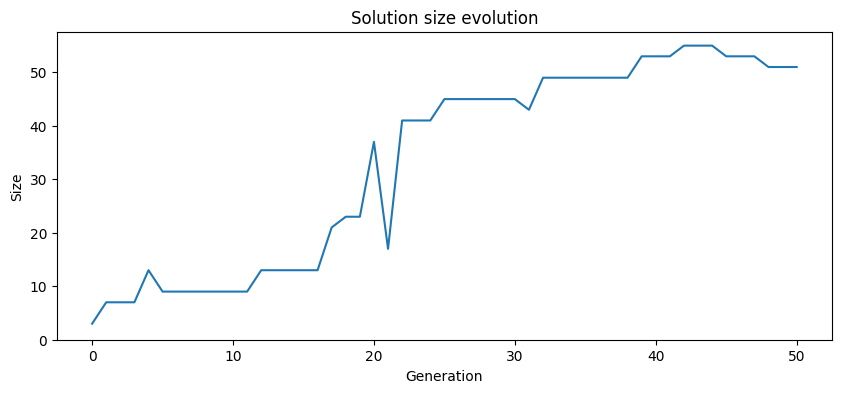

In [45]:
plt.figure(figsize=(10, 4))

plt.plot(history_sizes)
plt.title('Solution size evolution')
plt.xlabel('Generation')
plt.ylabel('Size')
plt.ylim(bottom=0)
plt.show()


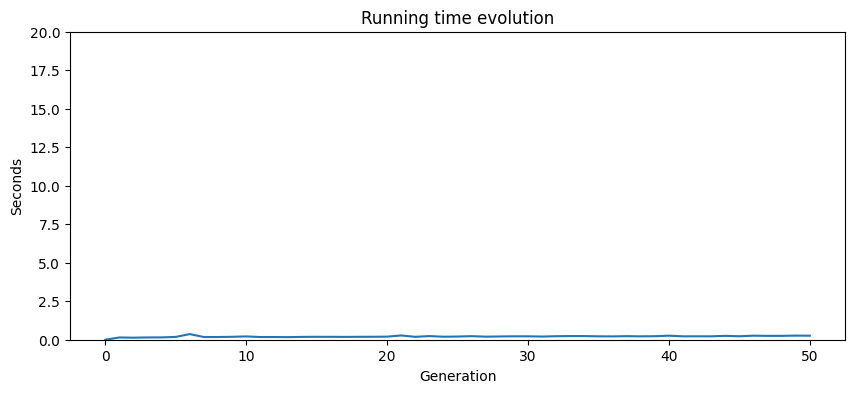

Total time: 0.18 minutes.



In [46]:
plt.figure(figsize=(10, 4))

plt.plot(history_timing)
plt.title('Running time evolution')
plt.xlabel('Generation')
plt.ylabel('Seconds')
plt.ylim(bottom=0, top=20)
plt.show()

print('Total time: {:.2f} minutes.\n'.format(sum(history_timing)/60.))


In [47]:
mheuristic.best_sol.printTree()

add( x_2, div( sub( add( add( x_3, div( x_6, div( x_10, x_0 ) ) ) mul( div( add( x_3, sub( x_3, x_0 ) ) mul( add( x_2, x_0 ) x_4 ) ) x_4 ) ) div( mul( x_4, x_4 ) mul( div( sub( x_3, x_0 ) mul( div( add( x_4, x_9 ) div( sub( x_3, x_0 ) mul( x_4, x_4 ) ) ) x_4 ) ) x_4 ) ) ) mul( x_4, x_4 ) ) )


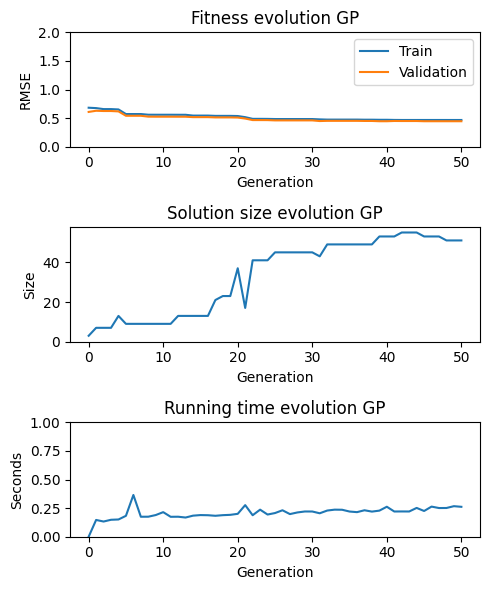

Best solution RMSE fitness: 0.47 train, 0.45 validation.

Total time: 0.18 minutes.



In [53]:
import matplotlib.pyplot as plt

# Cria uma figura
fig = plt.figure(figsize=(5, 6))

# Adiciona o primeiro subplot
ax1 = fig.add_subplot(311) # 311 significa 3 linhas, 1 coluna, posição 1
ax1.plot(history_fits, label='Train')
ax1.plot(history_val_fits, label='Validation')
ax1.set_title('Fitness evolution GP')
ax1.set_xlabel('Generation')
ax1.set_ylabel('RMSE')
ax1.set_ylim(bottom=0, top=2)
ax1.legend()

# Adiciona o segundo subplot
ax2 = fig.add_subplot(312) # 312 significa 3 linhas, 1 coluna, posição 2
ax2.plot(history_sizes)
ax2.set_title('Solution size evolution GP')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Size')
ax2.set_ylim(bottom=0)

# Adiciona o terceiro subplot
ax3 = fig.add_subplot(313) # 313 significa 3 linhas, 1 coluna, posição 3
ax3.plot(history_timing)
ax3.set_title('Running time evolution GP')
ax3.set_xlabel('Generation')
ax3.set_ylabel('Seconds')
ax3.set_ylim(bottom=0, top=1)

# Mostra a figura
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# Salva a figura
fig.savefig('meus_graficos.png', dpi=None, format='png', bbox_inches='tight', pad_inches=0.2)

print('Best solution RMSE fitness: {:.2f} train, {:.2f} validation.\n'.format(mheuristic.best_sol.fit.item(), mheuristic.best_sol.test_fit.item()))
print('Total time: {:.2f} minutes.\n'.format(sum(history_timing)/60.))

#### Wilcoxon test

In [48]:
_, p_value = wilcoxon(history_fits, history_val_fits)

if p_value < 0.05:
    print("Significant difference detected (p-value < 0.05)")
else:
    print("No significant difference (p-value >= 0.05)")

Significant difference detected (p-value < 0.05)
